In [1]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64 ━━╸━━━━━━━━━━━━━━━╸━━━━━━   0.0 B /  ??.?MB @ 

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [4]:
tesla = yf.Ticker("TSLA")

In [5]:
tesla_data = tesla.history(period="max")

In [6]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


In [7]:
tesla_data.reset_index(inplace=True)
tesla_data.tail()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
3322,3322,2023-09-11,264.269989,274.850006,260.609985,273.579987,174667900,0,0.0
3323,3323,2023-09-12,270.760010,278.390015,266.600006,267.480011,135999900,0,0.0
3324,3324,2023-09-13,270.070007,274.980011,268.100006,271.299988,111673700,0,0.0
3325,3325,2023-09-14,271.320007,276.709991,270.420013,276.040009,107709800,0,0.0
3326,3326,2023-09-15,277.549988,278.980011,271.000000,274.390015,133422800,0,0.0


In [8]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data  = requests.get(url).text

In [9]:
beautiful_soup = BeautifulSoup(html_data, 'html.parser')

In [40]:
tables = beautiful_soup.find_all('table')
tesla_revenue = pd.read_html(str(tables))[0]
tesla_revenue.columns = ["Date", "Revenue"]
print(tesla_revenue.head())

   Date  Revenue
0  2021  $53,823
1  2020  $31,536
2  2019  $24,578
3  2018  $21,461
4  2017  $11,759


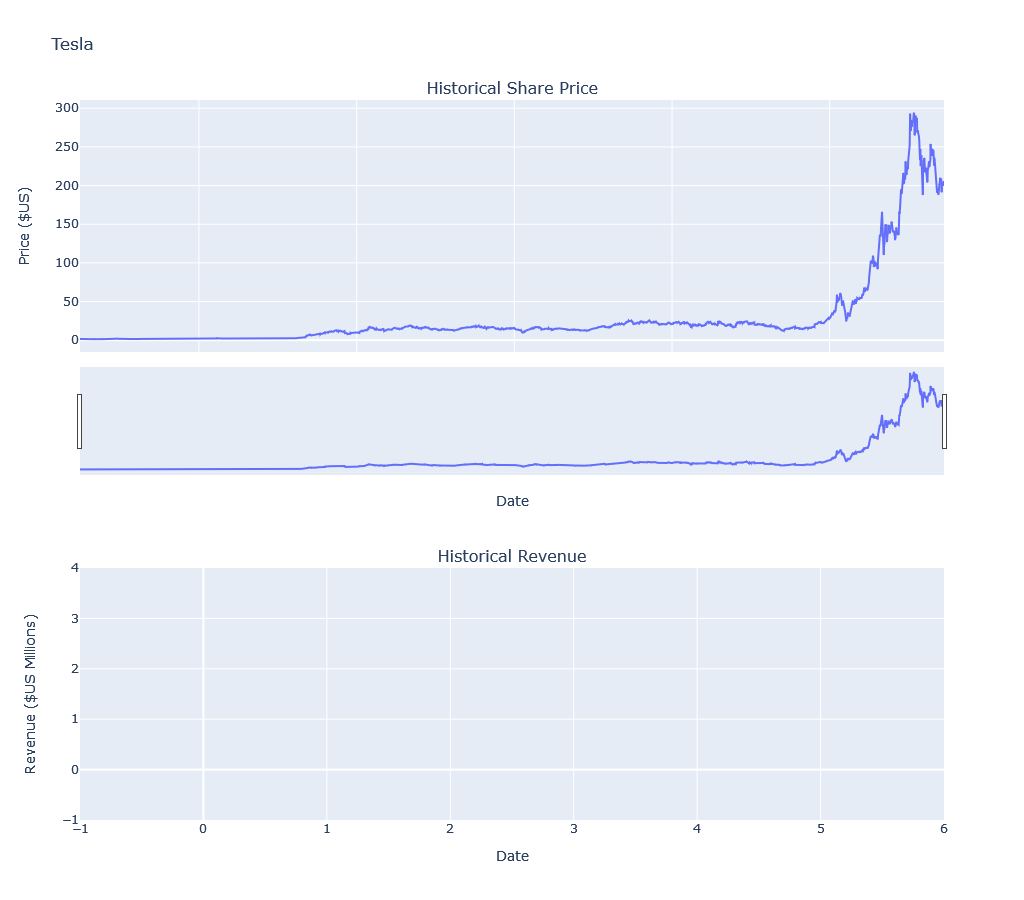

In [39]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

In [41]:
gme = yf.Ticker("GME")

In [42]:
gme_data = gme.history(period="max")

In [43]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [44]:
gme_data.reset_index(inplace=True)
gme_data.tail()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
5430,5430,2023-09-11,17.850000,17.850000,16.900000,17.020000,3543800,0.0,0.0
5431,5431,2023-09-12,17.530001,18.500000,17.190001,17.230000,5179400,0.0,0.0
5432,5432,2023-09-13,17.309999,17.930000,17.270000,17.809999,3012600,0.0,0.0
5433,5433,2023-09-14,17.799999,18.520000,17.600000,18.330000,3078000,0.0,0.0
5434,5434,2023-09-15,18.360001,18.610001,18.150000,18.219999,6158000,0.0,0.0


In [45]:
gurl = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data  = requests.get(gurl).text

In [61]:
beautiful_soup = BeautifulSoup(html_data, 'html.parser')

In [65]:
tables = beautiful_soup.find_all('table')
gme_revenue = pd.read_html(str(tables))[0]
gme_revenue.columns = ["Date", "Revenue"]
print(gme_revenue.head())

   Date Revenue
0  2020  $6,466
1  2019  $8,285
2  2018  $8,547
3  2017  $7,965
4  2016  $9,364


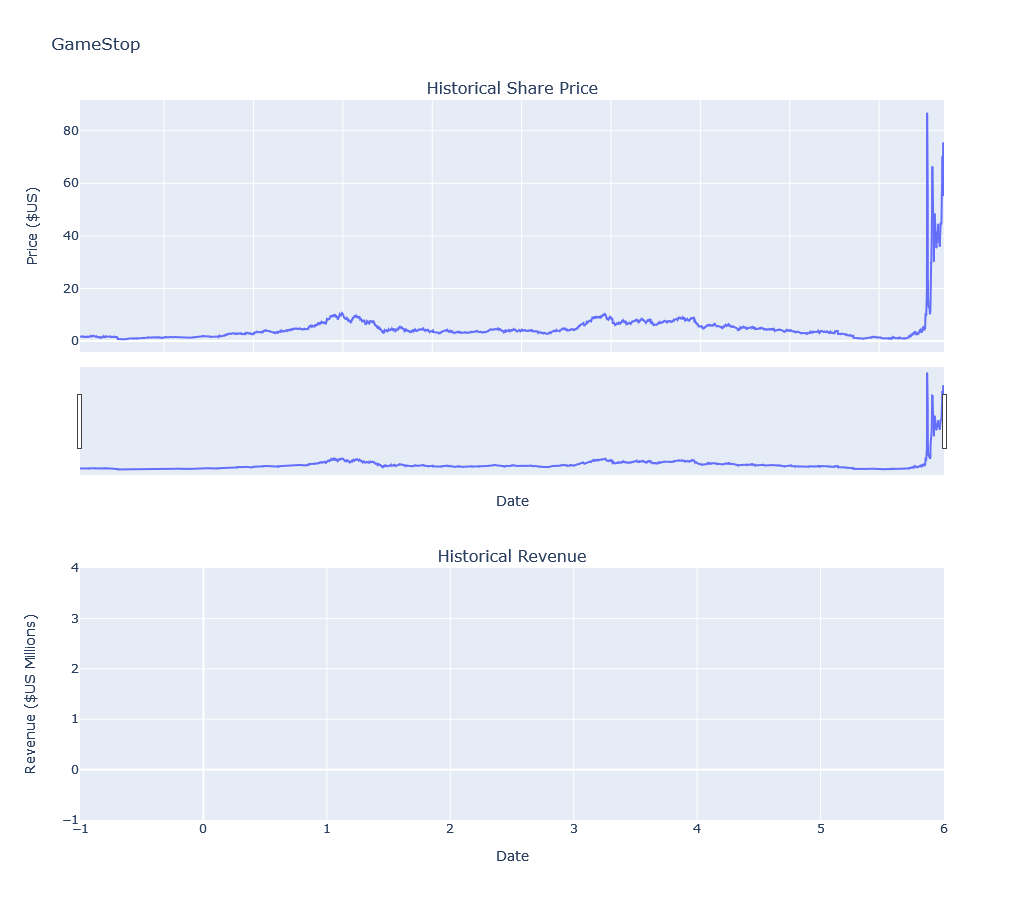

In [64]:
make_graph(gme_data, gme_revenue, 'GameStop')